In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1)

In [2]:
#importing data from csv file usinf pandas
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Visualization

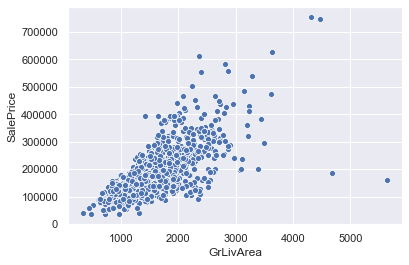

In [3]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train)

In [4]:
train=train.drop(train.loc[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index,0)
train.reset_index(drop=True, inplace=True)

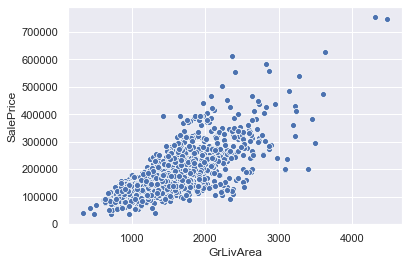

In [5]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train)

In [6]:
corr=train.drop('Id',1).corr().sort_values(by='SalePrice',ascending=False).round(2)
print(corr['SalePrice'])

SalePrice        1.00
OverallQual      0.80
GrLivArea        0.73
TotalBsmtSF      0.65
GarageCars       0.64
1stFlrSF         0.63
GarageArea       0.63
FullBath         0.56
TotRmsAbvGrd     0.54
YearBuilt        0.52
YearRemodAdd     0.51
GarageYrBlt      0.49
MasVnrArea       0.48
Fireplaces       0.47
BsmtFinSF1       0.41
LotFrontage      0.37
WoodDeckSF       0.32
OpenPorchSF      0.32
2ndFlrSF         0.32
HalfBath         0.28
LotArea          0.27
BsmtFullBath     0.23
BsmtUnfSF        0.21
BedroomAbvGr     0.17
ScreenPorch      0.11
PoolArea         0.10
MoSold           0.05
3SsnPorch        0.04
BsmtFinSF2      -0.01
BsmtHalfBath    -0.02
MiscVal         -0.02
LowQualFinSF    -0.03
YrSold          -0.03
OverallCond     -0.08
MSSubClass      -0.08
EnclosedPorch   -0.13
KitchenAbvGr    -0.14
Name: SalePrice, dtype: float64


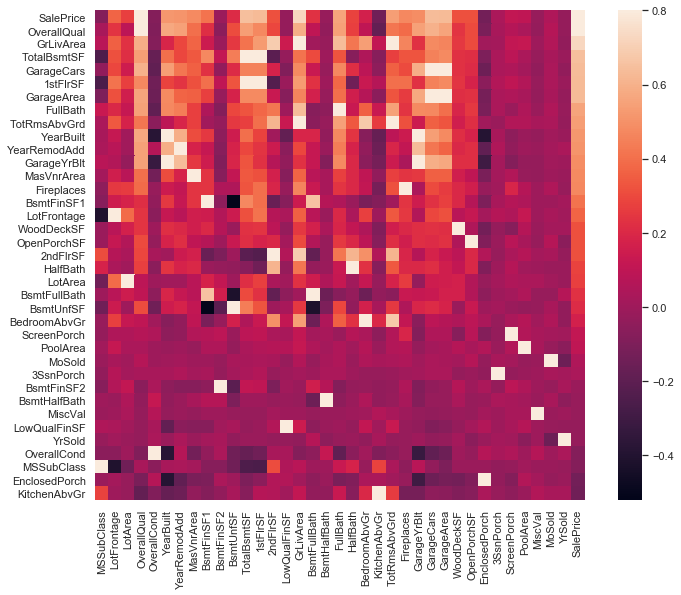

In [7]:
plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

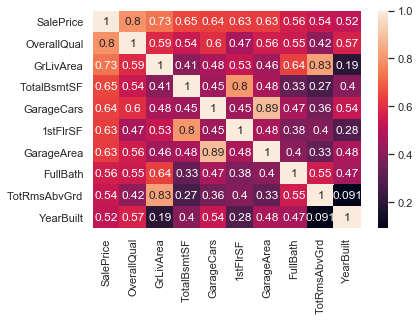

In [8]:
#now lets create heatmap for top 10 correlated features
cols =corr['SalePrice'].head(10).index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, annot=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [9]:
# sns.pairplot(train[corr['SalePrice'].head(10).index])

In [10]:
trainrow=train.shape[0]
testrow=test.shape[0]

In [11]:
#copying id data
testids=test['Id'].copy()

In [12]:
#copying sales priece
y_train=train['SalePrice'].copy()

In [13]:
#combining train and test data
data=pd.concat((train,test)).reset_index(drop=True)
data=data.drop('SalePrice',1)

In [14]:
#dropping id columns
data=data.drop('Id',axis=1)

# Missing Data

In [15]:
#checking missing data
missing=data.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior1st        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64

In [16]:
#PoolQC is quality of pool but mostly house does not have pool so putting NA
data['PoolQC']=data['PoolQC'].fillna('NA')
data['PoolQC'].unique()

array(['NA', 'Ex', 'Fa', 'Gd'], dtype=object)

In [17]:
#MiscFeature: mostly house does not have it so putting NA
data['MiscFeature']=data['MiscFeature'].fillna('NA')
data['MiscFeature'].unique()

array(['NA', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [18]:
#Alley,Fence,FireplaceQu: mostly house does not have it so putting NA
data['Alley']=data['Alley'].fillna('NA')
data['Alley'].unique()

data['Fence']=data['Fence'].fillna('NA')
data['Fence'].unique()

data['FireplaceQu']=data['FireplaceQu'].fillna('NA')
data['FireplaceQu'].unique()

array(['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [19]:
#LotFrontage: all house have linear connected feet so putting most mean value VISHAL
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].dropna().mean())

In [20]:
#GarageCond,GarageQual,GarageFinish
data['GarageCond']=data['GarageCond'].fillna('NA')
data['GarageCond'].unique()

data['GarageQual']=data['GarageQual'].fillna('NA')
data['GarageQual'].unique()

data['GarageFinish']=data['GarageFinish'].fillna('NA')
data['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'NA'], dtype=object)

In [21]:
#GarageYrBlt,GarageType,GarageArea,GarageCars putting 0
data['GarageYrBlt']=data['GarageYrBlt'].fillna(0)
data['GarageType']=data['GarageType'].fillna(0)
data['GarageArea']=data['GarageArea'].fillna(0)
data['GarageCars']=data['GarageCars'].fillna(0)

In [22]:
#BsmtExposure,BsmtCond,BsmtQual,BsmtFinType2,BsmtFinType1 
data['BsmtExposure']=data['BsmtExposure'].fillna('NA')
data['BsmtCond']=data['BsmtCond'].fillna('NA')
data['BsmtQual']=data['BsmtQual'].fillna('NA')
data['BsmtFinType2']=data['BsmtFinType2'].fillna('NA')
data['BsmtFinType1']=data['BsmtFinType1'].fillna('NA')

#BsmtFinSF1,BsmtFinSF2 
data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(0)
data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(0)

In [23]:
#MasVnrType,MasVnrArea
data['MasVnrType']=data['MasVnrType'].fillna('NA')
data['MasVnrArea']=data['MasVnrArea'].fillna(0)

In [24]:
#MSZoning 
data['MSZoning']=data['MSZoning'].fillna(data['MSZoning'].dropna().sort_values().index[0])

In [25]:
#Utilities
data['Utilities']=data['Utilities'].fillna(data['Utilities'].dropna().sort_values().index[0])

In [26]:
#BsmtFullBath
data['BsmtFullBath']=data['BsmtFullBath'].fillna(0)

#Functional
data['Functional']=data['Functional'].fillna(data['Functional'].dropna().sort_values().index[0])

#BsmtHalfBath
data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(0)

#BsmtUnfSF
data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(0)

In [27]:
#Exterior2nd
data['Exterior2nd']=data['Exterior2nd'].fillna('NA')

#Exterior1st
data['Exterior1st']=data['Exterior1st'].fillna('NA')

In [28]:
#TotalBsmtSF
data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(0)

In [29]:
#SaleType
data['SaleType']=data['SaleType'].fillna(data['SaleType'].dropna().sort_values().index[0])

In [30]:
#Electrical
data['Electrical']=data['Electrical'].fillna(data['Electrical'].dropna().sort_values().index[0])

In [31]:
#KitchenQual
data['KitchenQual']=data['KitchenQual'].fillna(data['KitchenQual'].dropna().sort_values().index[0])

In [32]:
#lets check any missing remain
missing=data.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing

Series([], dtype: int64)

In [33]:
#great no missing data

# Feature Engineering

In [34]:
data['GrLivArea_2']=data['GrLivArea']**2
data['GrLivArea_3']=data['GrLivArea']**3
data['GrLivArea_4']=data['GrLivArea']**4

data['TotalBsmtSF_2']=data['TotalBsmtSF']**2
data['TotalBsmtSF_3']=data['TotalBsmtSF']**3
data['TotalBsmtSF_4']=data['TotalBsmtSF']**4

data['GarageCars_2']=data['GarageCars']**2
data['GarageCars_3']=data['GarageCars']**3
data['GarageCars_4']=data['GarageCars']**4

data['1stFlrSF_2']=data['1stFlrSF']**2
data['1stFlrSF_3']=data['1stFlrSF']**3
data['1stFlrSF_4']=data['1stFlrSF']**4

data['GarageArea_2']=data['GarageArea']**2
data['GarageArea_3']=data['GarageArea']**3
data['GarageArea_4']=data['GarageArea']**4

In [35]:
#lets add 1stFlrSF and 2ndFlrSF and create new feature floorfeet
data['Floorfeet']=data['1stFlrSF']+data['2ndFlrSF']
data=data.drop(['1stFlrSF','2ndFlrSF'],1)

In [36]:
data=pd.get_dummies(data=data,columns=['MSSubClass'],prefix='MSSubClass')
data=pd.get_dummies(data=data,columns=['MSZoning'],prefix='MSZoning')
data.head()

,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_811,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,0,0,0,1,0
1,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,0,0,0,1,0
3,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,0,0,0,0,0,1,0
4,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,0,0,0,1,0


create_band('LotFrontage',3)

In [37]:
data=pd.get_dummies(data=data,columns=['Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle'])
data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,65.0,8450,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,68.0,11250,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,1,0,0
4,84.0,14260,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0


In [38]:
data=pd.get_dummies(data=data,columns=['OverallQual'],prefix='OverallQual')

In [39]:
data=pd.get_dummies(data=data,columns=['OverallCond'],prefix='OverallCond')

In [40]:
data['Remodeled']=0
data.loc[data['YearBuilt']!=data['YearRemodAdd'],'Remodeled']=1
data=data.drop('YearRemodAdd',1)
data=pd.get_dummies(data=data,columns=['Remodeled'])

In [41]:
data=pd.get_dummies(data=data,columns=['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition'])

In [42]:
data['Bath']=data['BsmtFullBath']+data['BsmtHalfBath']*.5+data['FullBath']+data['HalfBath']*.5
data=data.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],1)

In [43]:
data=pd.get_dummies(data=data,columns=['BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd'])

In [44]:
data.loc[data['GarageYrBlt']==2207.,'GarageYrBlt']=0

great we have done Feature Engineering

# Feature Scalling

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
x_train=data.iloc[:trainrow]
x_test=data.iloc[trainrow:]
scaler=StandardScaler()
scaler=scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

great we have done with feature scalling,
now lets do modeling

# Modeling

In [48]:
#lest import Ml algorithms which we will use to predict SalePrice
from sklearn.linear_model import LinearRegression
reg_liner=LinearRegression()
reg_liner.fit(x_train_scaled,y_train)
reg_liner.score(x_train_scaled,y_train)

0.9561679637360336

In [49]:
from sklearn.linear_model import LogisticRegression
reg_logistic=LogisticRegression()
reg_logistic.fit(x_train_scaled,y_train)
reg_logistic.score(x_train_scaled,y_train)
y_predict=reg_logistic.predict(x_test_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(x_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(x_train, y_train)], 
             verbose=False)
print(my_model.score(x_train,y_train))
y_predict=my_model.predict(x_test)

[12:51:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9905700029207838


In [51]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# rf.fit(x_train_scaled, y_train);
# print(rf.score(x_train_scaled,y_train))
# y_predict=rf.predict(x_test_scaled)

In [55]:
submission = pd.DataFrame({
        "Id": testids,
        "SalePrice": y_predict
    })
submission


,Id,SalePrice
0,1461,125979.085938
1,1462,165681.609375
2,1463,190794.531250
3,1464,193627.546875
4,1465,179360.890625
...,...,...
1454,2915,84482.585938
1455,2916,75767.273438
1456,2917,142813.328125
1457,2918,128275.617188


In [56]:
submission.to_csv('submission.csv', index=False)